# Seminar No. 2: Pair testing

## 1 Scatter plot of Owning a hpuse vs getting married
For the Household marriage.RData dataset depict the plot of the **ownhh** and **getmar** variables. 
Since the repeated values of the pairs are located the same, slightly misrepresent their location.

In [19]:
import pandas as pd
hh_marriage = pd.read_csv("../Data/h_marriage.csv").drop("Unnamed: 0", axis=1)  # load the data

In [20]:
# create the off-centered variables to plot them scattered (just adding a random number from normal distribution
import numpy as np
hh_marriage['ownhh_transpose'] = hh_marriage['ownhh'] + np.random.normal(0, 0.1, hh_marriage.shape[0])
hh_marriage['getmar_transform'] = hh_marriage['getmar'] + np.random.normal(0, 0.1, hh_marriage.shape[0])

The newly created cariables are in the original data set, broad look may be done in the following table

In [21]:
hh_marriage  # show the data frame

,ownhh,getmar,ownhh_transpose,getmar_transform
0,2,4,2.101617,4.108154
1,2,5,2.008576,5.117837
2,3,3,2.948901,2.928425
3,1,3,1.153017,3.111712
4,2,3,1.966078,2.964851
...,...,...,...,...
1341,5,2,5.001775,2.066516
1342,2,4,2.085396,4.134660
1343,2,1,2.051885,0.991712
1344,1,2,0.771975,2.190720


In [23]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)

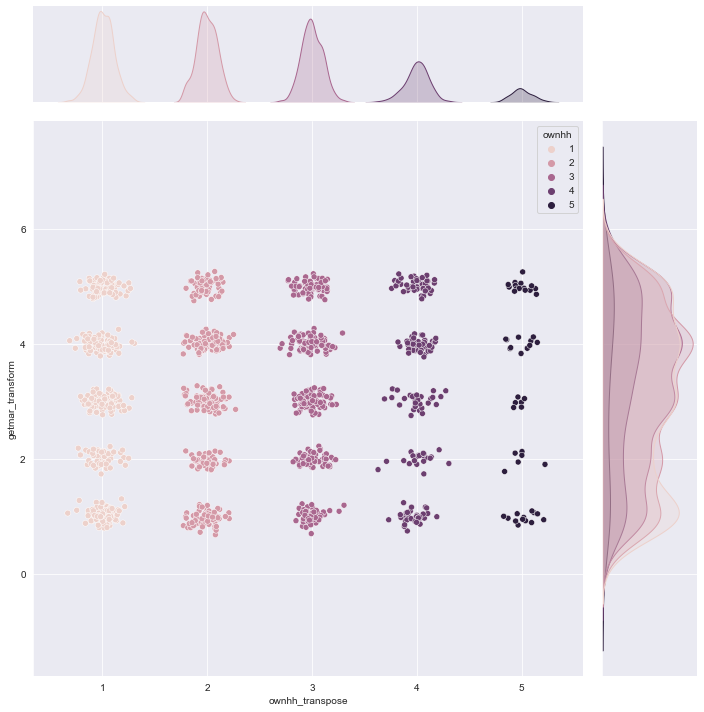

In [24]:
sns.jointplot(data=hh_marriage, x='ownhh_transpose', y='getmar_transform', hue='ownhh', height=10)

## 2 Relationship between our variables

In the Household marriage.RData dataset state and compare the associations between the
variables ”opinion on own household importance”and ”opinion on marriage importance”.
By the Spearman correlation coeficient test the indepence of the two variables. Regarding the value of rS, 
evaluate the significance and practical application relevance of the test.
Compare the p value of this test with the p value of the $\chi^2$ test of independence. What is
the change in the p values related to the data ordinality? 

In [32]:
from scipy import stats
r_pearson, p_val = stats.pearsonr(hh_marriage['ownhh'], hh_marriage['getmar'])
print(
f"Correlation is {r_pearson: .4f} \n"
f"P_value of the zero correlation test is {p_val: .4f}"
)


Correlation is  0.0806 
P_value of the zero correlation test is  0.0031


In [36]:
r_spearman, p_val_sp = stats.spearmanr(hh_marriage['ownhh'], hh_marriage['getmar'])
print(
f"Spearman r is {r_spearman: .4f} \n"
f"P_value of the zero correlation test is {p_val_sp: .4f}"
)

Spearman r is  0.0837 
P_value of the zero correlation test is  0.0021


In [40]:
stats.kruskal(hh_marriage['ownhh'], hh_marriage['getmar'])

KruskalResult(statistic=226.44696652252887, pvalue=3.549978050301059e-51)

In [37]:
chi_stat, p_val, dfree, expected =  stats.chi2_contingency(pd.crosstab(hh_marriage.ownhh, hh_marriage.getmar))

print(f"Chisq = {chi_stat: .4f}, p_value = {p_val: .4f}, degrees of freedom = {dfree}")

Chisq =  31.7408, p_value =  0.0108, degrees of freedom = 16


To assess the relationship, we might use the relative frequencies as plotted using heatmap

Text(0.5, 1.0, 'Heatmap of relative frequencies')

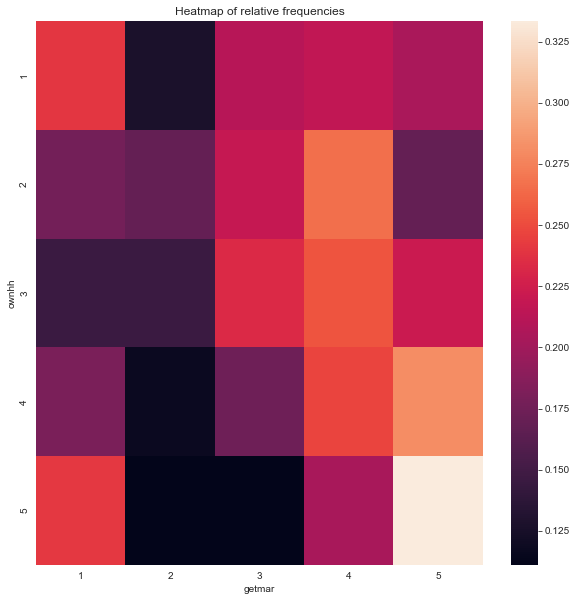

In [42]:
import seaborn as sns
sns.heatmap(pd.crosstab(hh_marriage.ownhh, hh_marriage.getmar, normalize='index'))
plt.title("Heatmap of relative frequencies")

## 3 Show the differences between the opinions on owning a household vs getting married

For our purposes, it is useful to create a new variable called *diff* as a plain difference between *ownhh* and *getmar*

In [44]:
hh_marriage['diff'] = hh_marriage['ownhh'] - hh_marriage['getmar']

<AxesSubplot:xlabel='diff', ylabel='Density'>

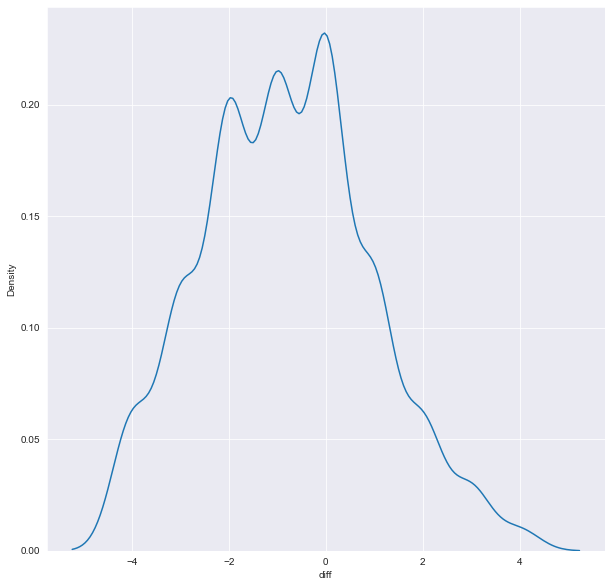

In [47]:
sns.kdeplot(hh_marriage['diff'])

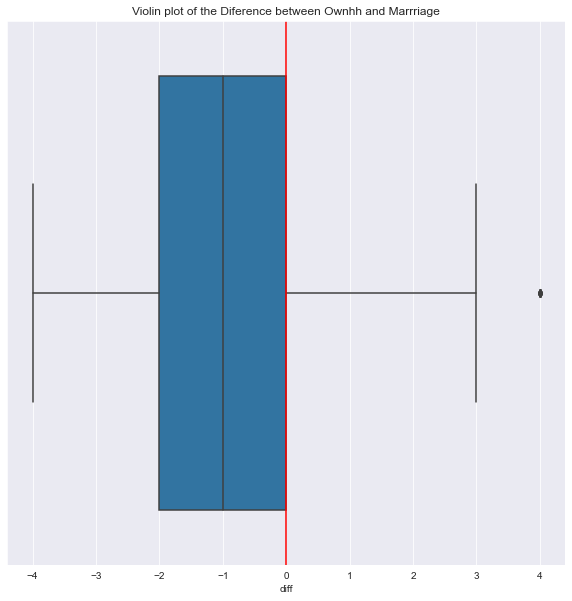

In [45]:
sns.boxplot(x=hh_marriage['diff'])
plt.title("Violin plot of the Diference between Ownhh and Marrriage")
plt.axvline(x=0, color="red")

We may see that the distribution is slightly positively skewed, and the mean value is below 0


In [57]:
hh_marriage[['diff']].describe()

,diff
count,1346.000000
mean,-0.800892
std,1.742672
min,-4.000000
25%,-2.000000
50%,-1.000000
75%,0.000000
max,4.000000


At first, we conduct the t_test of the zero mean value.

In [49]:
# t-test, two dependent variables
stats.ttest_rel(hh_marriage['ownhh'], hh_marriage['getmar'])

Ttest_relResult(statistic=-16.86089162609198, pvalue=5.152072723524525e-58)

In [50]:
# t-test, single variable
stats.ttest_1samp(hh_marriage['diff'], popmean=0)

Ttest_1sampResult(statistic=-16.86089162609198, pvalue=5.152072723524525e-58)

We may see that results are equivalent, regardless if we test the *diff* against 0 or the difference
between the two variables. In both cases, we found a significant difference between the two variables within observations.

In [51]:
# wilcoxon test
stats.wilcoxon(hh_marriage['ownhh'], hh_marriage['getmar'])

WilcoxonResult(statistic=125911.0, pvalue=4.028596298277015e-53)

In [52]:
# testing the correlation
hh_marriage[['ownhh', 'getmar']].corr().apply(lambda x: round(x, 3))

,ownhh,getmar
ownhh,1.000,0.081
getmar,0.081,1.000


## 4 Crime dataset

In [54]:
crime = pd.read_csv("../Data/criminality.csv").drop("Unnamed: 0", axis=1)
crime['state']= crime['state'].astype("str")
crime.columns = crime.columns.str.replace(".", "_")
crime.head()

C:\Users\A200083283\AppData\Local\Temp\ipykernel_11324\1374053789.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  crime.columns = crime.columns.str.replace(".", "_")


,state,violence,murders,big_city,white_men,high_school,poverty,broken_families
0,101,761,9.0,41.8,75.2,86.6,9.1,14.3
1,102,780,11.6,67.4,73.5,66.9,17.4,11.5
2,103,593,10.2,44.7,82.9,66.3,20.0,10.7
3,104,715,8.6,84.7,88.6,78.7,15.4,12.1
4,105,1078,13.1,96.7,79.3,76.2,18.2,12.5


In [55]:
crime = crime.set_index(['state'])

In [56]:
crime.dtypes

violence             int64
murders            float64
big_city           float64
white_men          float64
high_school        float64
poverty            float64
broken_families    float64
dtype: object

To assess relationships between pairs of variables, we might use the pairplot. On the diagonal axis are histograms while
non-diagonal plots are shown as scatterplots

Text(0.5, 0.98, 'Pair plots of Crime data variables')

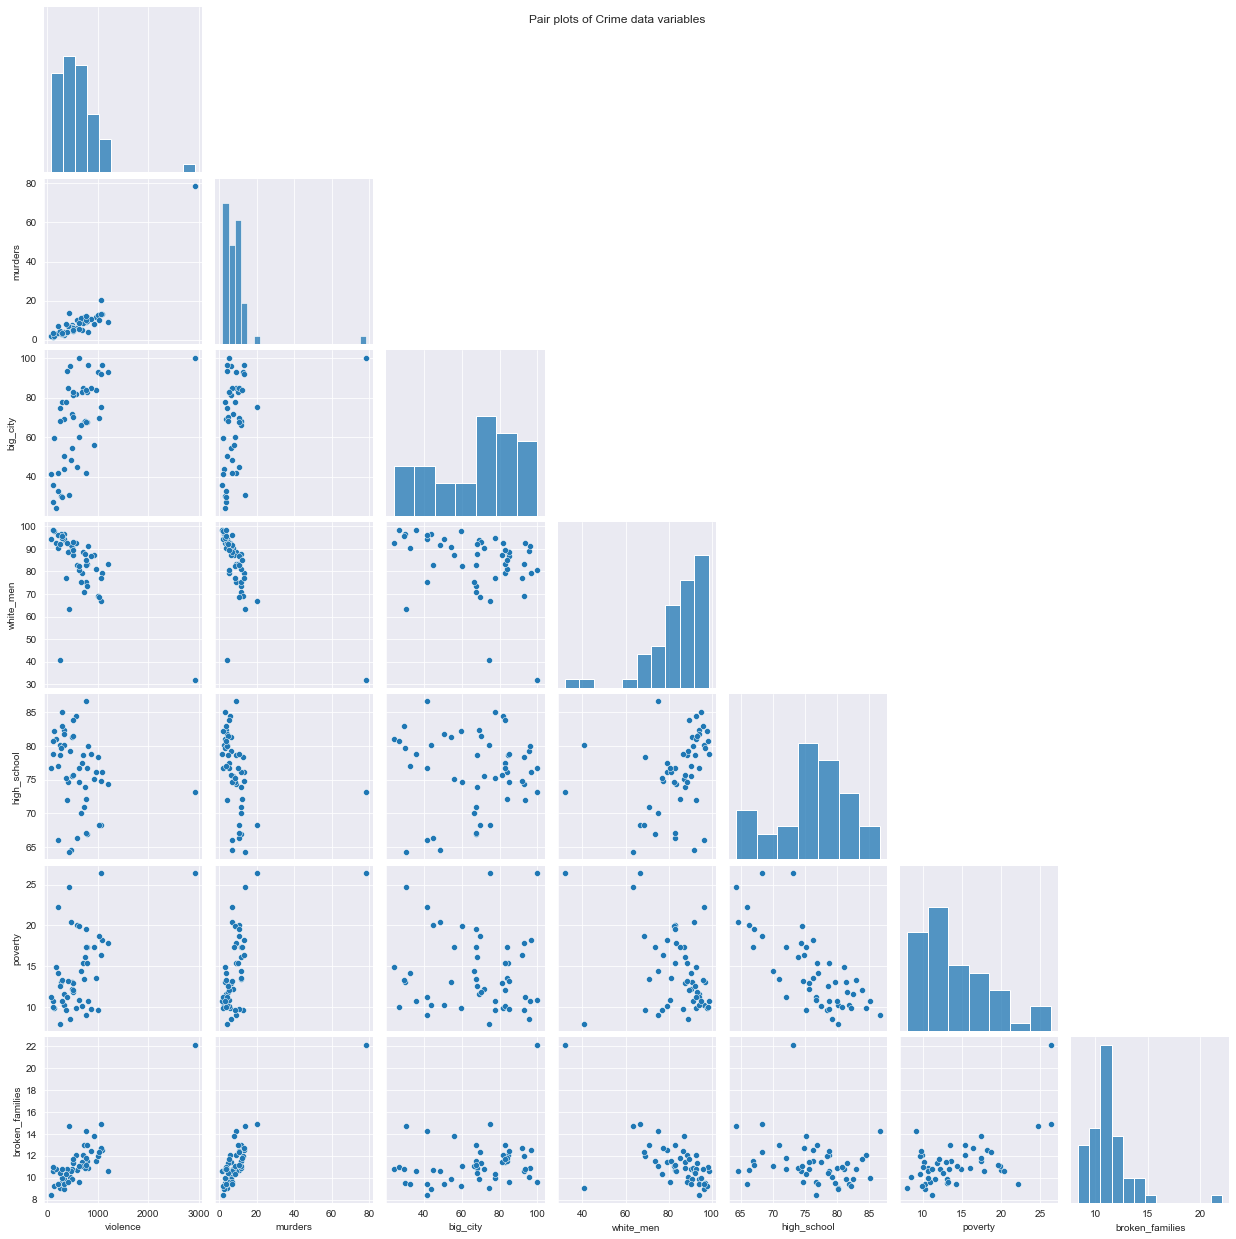

In [57]:
crime_pairs = sns.pairplot(crime, corner=True)
crime_pairs.fig.suptitle(("Pair plots of Crime data variables"))

It might also be useful to visualize the correlations using heatmaps

<AxesSubplot:>

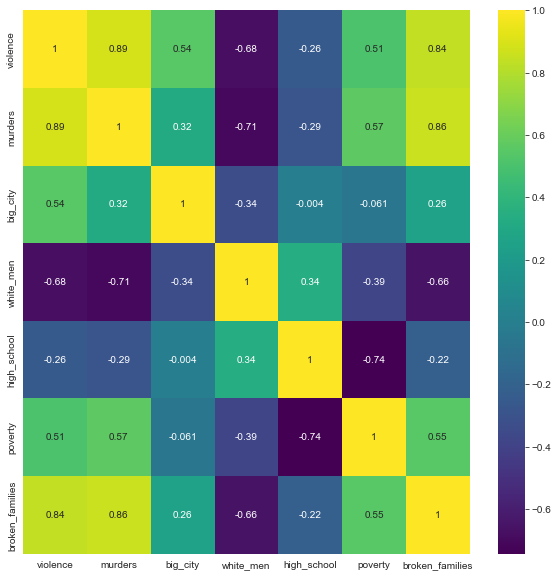

In [59]:
# correlation matrix, visualized using the heatmap which changes its value according to the continuous value
sns.heatmap(crime.corr(), annot=True, cmap="viridis")

In [61]:
crime.cov()

,violence,murders,big.city,white.men,high.school,poverty,broken.families
violence,194569.494902,4189.516392,5269.178431,-3959.434745,-631.596235,1030.281412,785.012078
murders,4189.516392,114.866431,74.390275,-100.315420,-17.145259,27.802353,19.529286
big.city,5269.178431,74.390275,482.115702,-98.191322,-0.488365,-6.093612,12.102455
white.men,-3959.434745,-100.315420,-98.191322,175.636337,25.058412,-23.641471,-18.463804
high.school,-631.596235,-17.145259,-0.488365,25.058412,31.271435,-19.071212,-2.607412
poverty,1030.281412,27.802353,-6.093612,-23.641471,-19.071212,21.015271,5.335271
broken.families,785.012078,19.529286,12.102455,-18.463804,-2.607412,5.335271,4.500737


In [62]:
crime.corr()

,violence,murders,big.city,white.men,high.school,poverty,broken.families
violence,1.000000,0.886196,0.544039,-0.677312,-0.256052,0.509508,0.838875
murders,0.886196,1.000000,0.316114,-0.706259,-0.286071,0.565871,0.858911
big.city,0.544039,0.316114,1.000000,-0.337435,-0.003977,-0.060538,0.259810
white.men,-0.677312,-0.706259,-0.337435,1.000000,0.338121,-0.389135,-0.656708
high.school,-0.256052,-0.286071,-0.003977,0.338121,1.000000,-0.743938,-0.219783
poverty,0.509508,0.565871,-0.060538,-0.389135,-0.743938,1.000000,0.548589
broken.families,0.838875,0.858911,0.259810,-0.656708,-0.219783,0.548589,1.000000


# 6 Countries dataset

Homework: The same tasks as in the problem 4 for the Countries dataset.

In [65]:
country_data = pd.read_csv("../Data/countries.csv", encoding="latin-1").set_index("Unnamed: 0")

In [66]:
country_data.describe()

,Agricul,Mining,Manufact.indust,Energ,Build.ind,Services,Finance,Soc.services
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000


In [67]:
country_data

,Agricul,Mining,Manufact.indust,Energ,Build.ind,Services,Finance,Soc.services
Unnamed: 0,,,,,,,,
Belgie,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6
Dánsko,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2
Francie,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6
Záp. Nìmecko,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3
Irsko,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8
Itálie,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1
Lucembursko,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2
Nizozemí,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5
Velká Británie,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3


<AxesSubplot:>

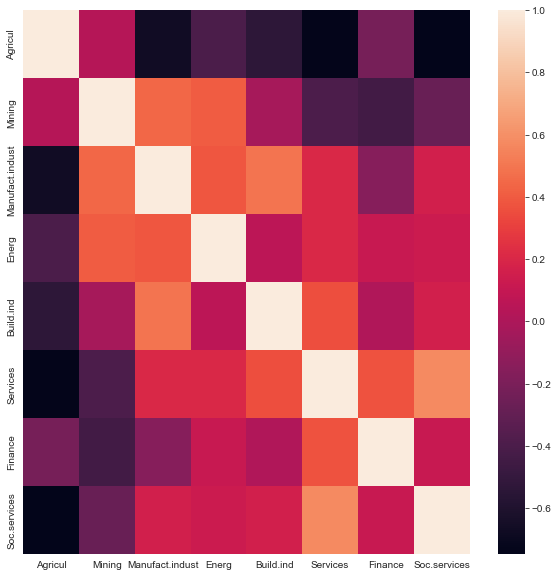

In [68]:
sns.heatmap(country_data.corr())

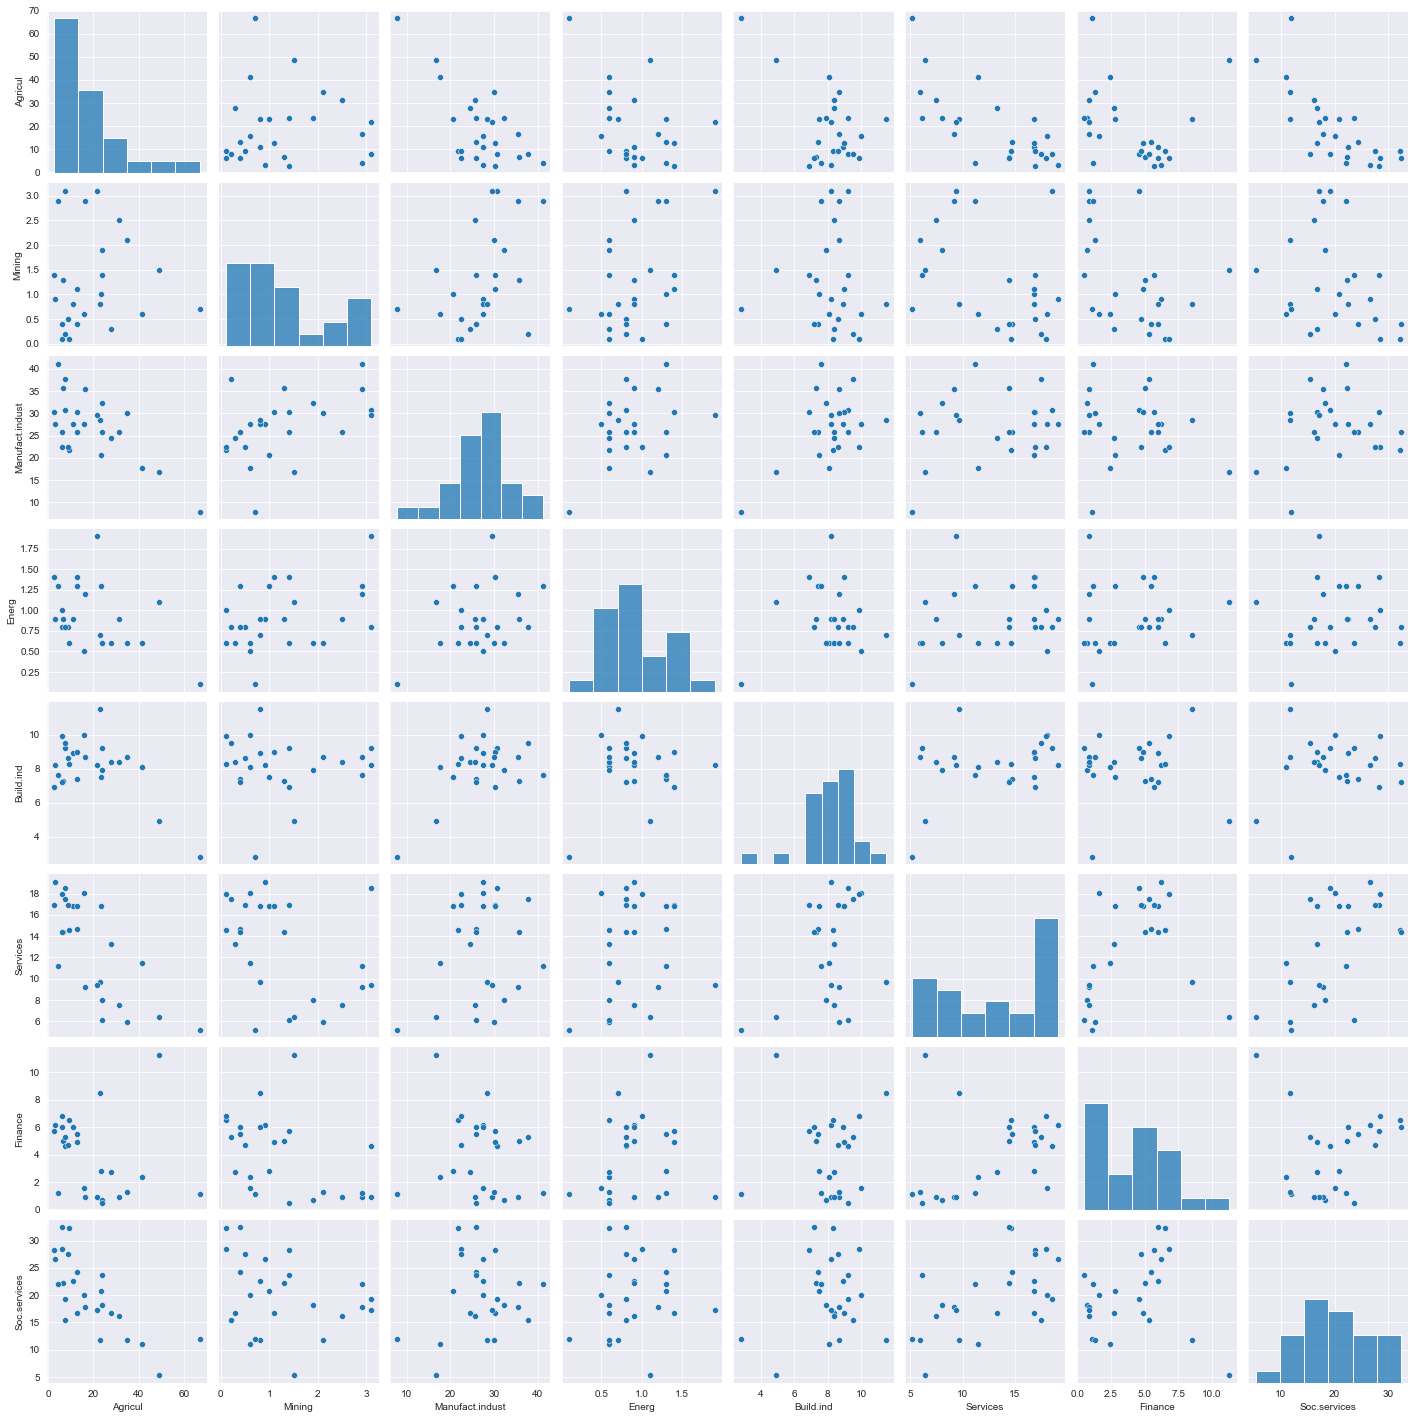

In [69]:
sns.pairplot(country_data)